In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from mflex.simulate.simulate_boundary import dipole

from mhsflex.field2d import Field2dData
from mhsflex.field3d import Field3dData, calculate_magfield, lf3d, j3d
from mhsflex.vis import plot
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt

from mflex.model.field.utility.poloidal import (
    phi,
    phi_low,
    phi_hypgeo,
    dphidz_hypgeo,
    dphidz,
    dphidz_low,
)

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)
c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 20.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 20.0
zmin = 0.0
zmax = 20.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z

z0 = 2.0

nf_max = 200

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
B_PHOTO = 500
data_bz = np.zeros((nresol_y, nresol_x))

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        data_bz[iy, ix] = dipole(x, y) * B_PHOTO

data2d = Field2dData(
    nresol_x,
    nresol_y,
    nresol_z,
    nresol_x,
    pixelsize_x,
    pixelsize_y,
    pixelsize_z,
    x_arr,
    y_arr,
    z_arr,
    data_bz,
)

In [4]:
a = 0.44
alpha = 0.05
b = 1.0
z0 = 2.0

In [5]:
data3d_02 = calculate_magfield(data2d, a, b, alpha, z0, 0.2)
data3dNW_02 = calculate_magfield(data2d, a, b, alpha, z0, 0.2, asymptotic=False)
data3d_10 = calculate_magfield(data2d, a, b, alpha, z0, 1.0)
data3dNW_10 = calculate_magfield(data2d, a, b, alpha, z0, 1.0, asymptotic=False)
data3d_20 = calculate_magfield(data2d, a, b, alpha, z0, 2.0)
data3dNW_20 = calculate_magfield(data2d, a, b, alpha, z0, 2.0, asymptotic=False)

In [6]:
a = 0.22
alpha = 0.05
b = 1.0
z0 = 2.0

In [7]:
data3d_02_22 = calculate_magfield(data2d, a, b, alpha, z0, 0.2)
data3dNW_02_22 = calculate_magfield(data2d, a, b, alpha, z0, 0.2, asymptotic=False)
data3d_10_22 = calculate_magfield(data2d, a, b, alpha, z0, 1.0)
data3dNW_10_22 = calculate_magfield(data2d, a, b, alpha, z0, 1.0, asymptotic=False)
data3d_20_22 = calculate_magfield(data2d, a, b, alpha, z0, 2.0)
data3dNW_20_22 = calculate_magfield(data2d, a, b, alpha, z0, 2.0, asymptotic=False)

In [8]:
iz_photo = 0
z_photo = 0.0

iz_z0half = int(nresol_z / 20.0)
z_z0half = z0 / 2.0

iz_z0 = int(nresol_z / 10.0)
z_z0 = z0

iz_2z0 = int(2 * nresol_z / 10.0)
z_2z0 = 2 * z0

In [9]:
x_plot = np.outer(data3d_02.y, np.ones(data3d_02.nx))
y_plot = np.outer(data3d_02.x, np.ones(data3d_02.ny)).T

In [10]:
Pressuremap = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFF2B1-E0FF00
        (0.000, c1),
        (1.000, (1.0, 1.0, 1.000)),  # (1.000, 0.812, 0.918)), #(0.937, 1.000, 0.984)),
        # (1.000, (1.000, 0.537, 0.000)),
    ),
)

In [11]:
deltaz = 0.2
data3d = data3d_02
data3dNW = data3dNW_02

folder = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/" + str(deltaz)

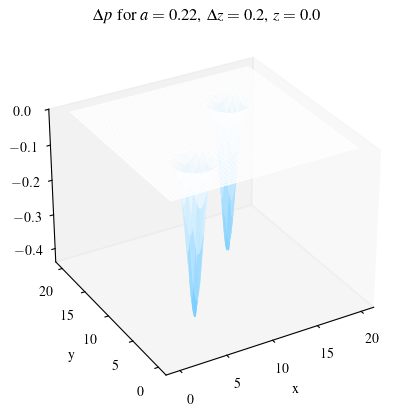

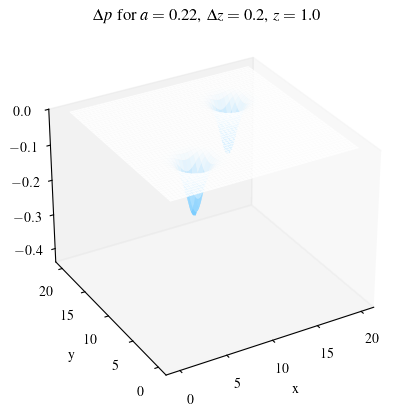

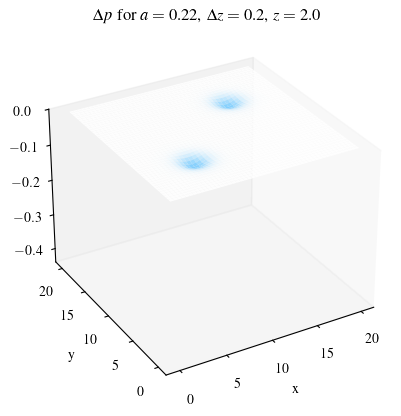

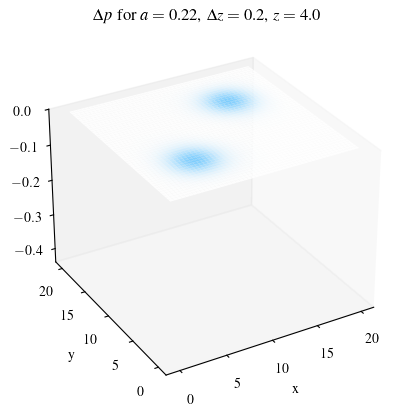

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3d.dpressure[:, :, 0],
    cmap=Pressuremap,
    vmin=data3d.dpressure[:, :, 0].min(),
    vmax=data3d.dpressure[:, :, 0].max(),
    label=r"\Delta p, z = " + str(0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_photo)
    )
plotname = folder + "/dpsurf_tanh_photo_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3d.dpressure[:, :, iz_z0half],
    vmin=data3d.dpressure[:, :, iz_z0half].min(),
    vmax=data3d.dpressure[:, :, iz_z0half].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0half),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_z0half)
    )
plotname = folder + "/dpsurf_tanh_z0half_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3d.dpressure[:, :, iz_z0],
    vmin=data3d.dpressure[:, :, iz_z0].min(),
    vmax=data3d.dpressure[:, :, iz_z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_z0)
    )
plotname = folder + "/dpsurf_tanh_z0_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3d.dpressure[:, :, iz_2z0],
    vmin=data3d.dpressure[:, :, iz_2z0].min(),
    vmax=data3d.dpressure[:, :, iz_2z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_2z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_2z0)
    )
plotname = folder + "/dpsurf_tanh_2z0_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

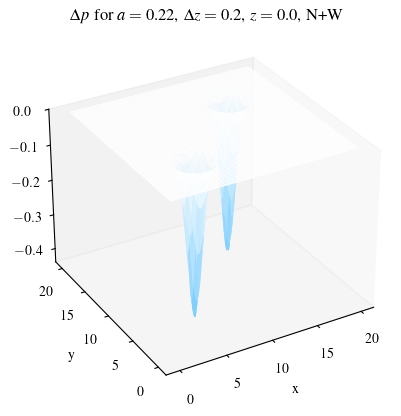

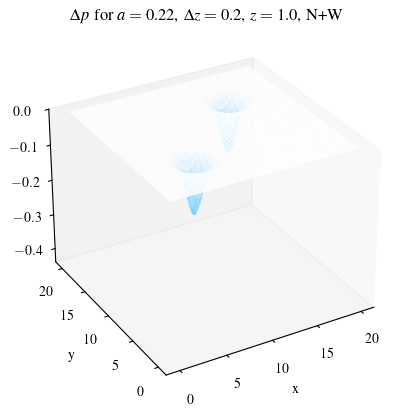

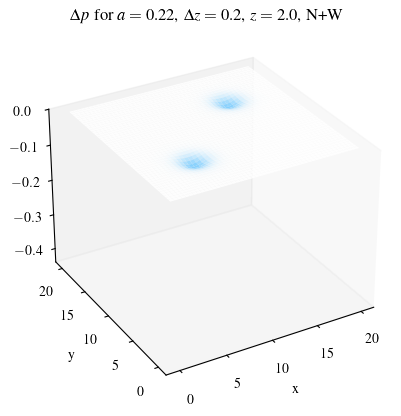

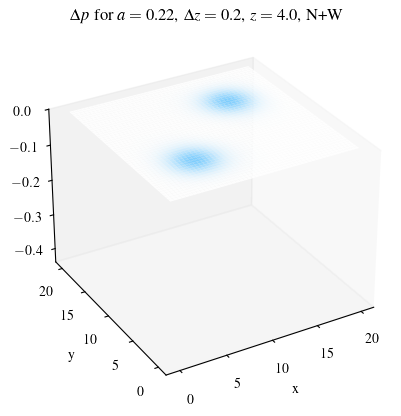

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, 0],
    cmap=Pressuremap,
    vmin=data3d.dpressure[:, :, 0].min(),
    vmax=data3d.dpressure[:, :, 0].max(),
    label=r"\Delta p, z = " + str(0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_photo)
        + r", N+W"
    )
plotname = folder + "/dpsurf_tanh_photo_NW_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, iz_z0half],
    vmin=data3d.dpressure[:, :, iz_z0half].min(),
    vmax=data3d.dpressure[:, :, iz_z0half].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0half),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_z0half)
        + r", N+W"
    )
plotname = folder + "/dpsurf_tanh_z0half_NW_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, iz_z0],
    vmin=data3d.dpressure[:, :, iz_z0].min(),
    vmax=data3d.dpressure[:, :, iz_z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_z0)
        + r", N+W"
    )
plotname = folder + "/dpsurf_tanh_z0_NW_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(
    y_plot,
    x_plot,
    data3dNW.dpressure[:, :, iz_2z0],
    vmin=data3d.dpressure[:, :, iz_2z0].min(),
    vmax=data3d.dpressure[:, :, iz_2z0].max(),
    cmap=Pressuremap,
    label="Delta p, z = " + str(z_2z0),
    alpha=0.9,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel(r"$ \Delta p$")
ax.view_init(30, 240, 0)
ax.set_zlim([data3dNW.dpressure[:, :, 0].min(), 0.0])
ax.xaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.xaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.yaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.yaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.2  # type : ignore
ax.zaxis._axinfo["tick"]["outward_factor"] = 0  # type : ignore
ax.grid(False)
# ax.xaxis.pane.fill = False  # type : ignore
# ax.yaxis.pane.fill = False  # type : ignore
# ax.zaxis.pane.fill = False  # type : ignore
plt.title(
        r"$\Delta p$ for $a =$ "
        + str(a)
        + r", $\Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(z_2z0)
        + r", N+W"
    )
plotname = folder + "/dpsurf_tanh_2z0_NW_" + str(deltaz) + ".png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

In [14]:
ErrormapP = colors.LinearSegmentedColormap.from_list(
    "my_gradient",
    (
        # Edit this gradient at https://eltos.github.io/gradient/#FFFFFF-FF8C2E
        (0.000, (1.000, 1.000, 1.000)),
        (1.000, c1),
    ),
)

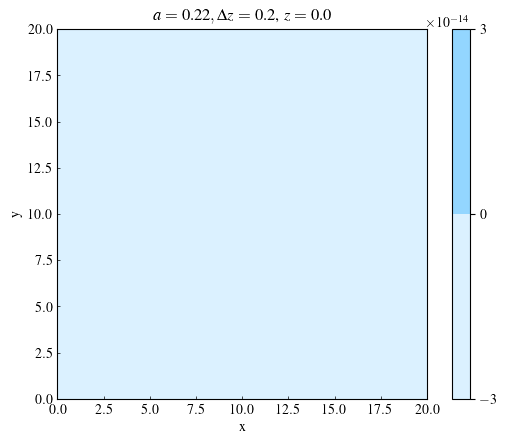

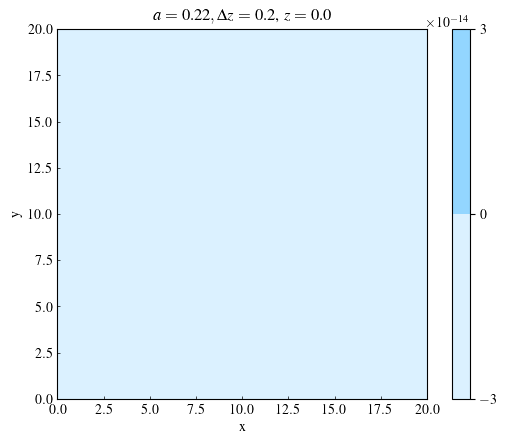

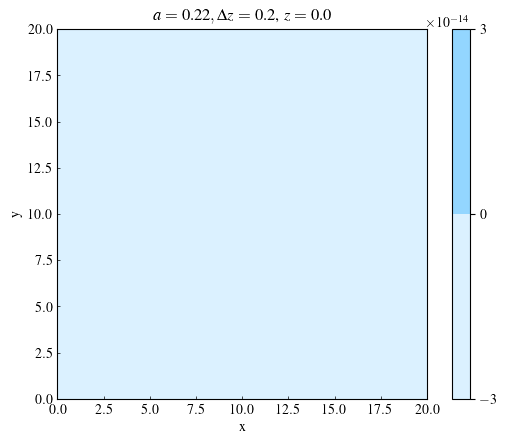

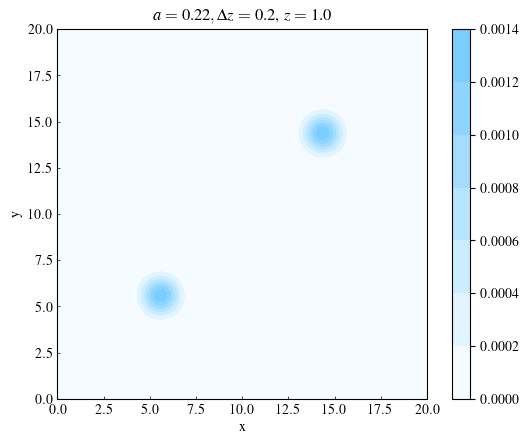

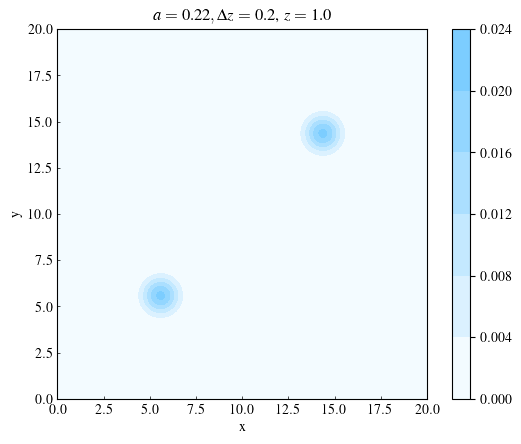

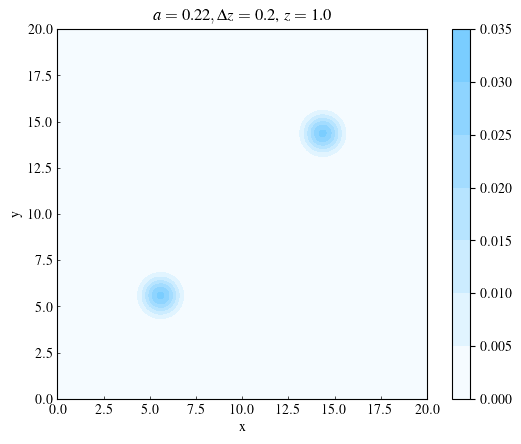

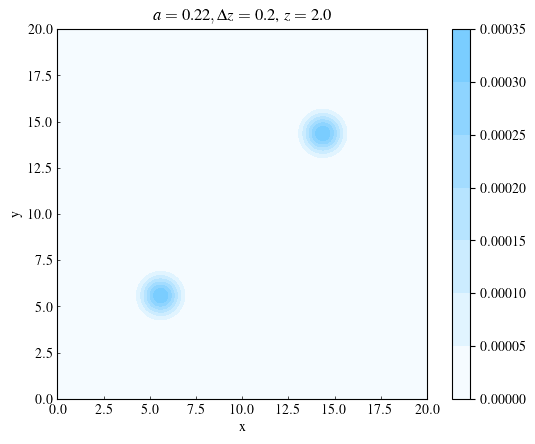

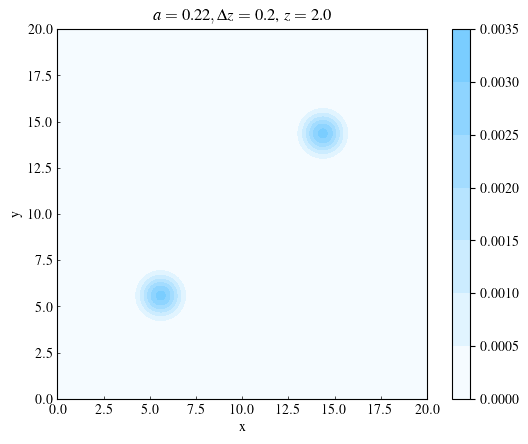

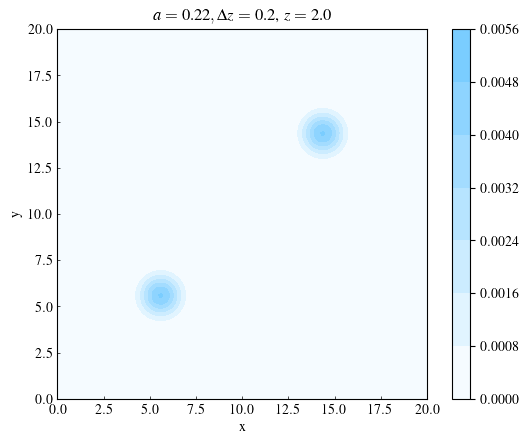

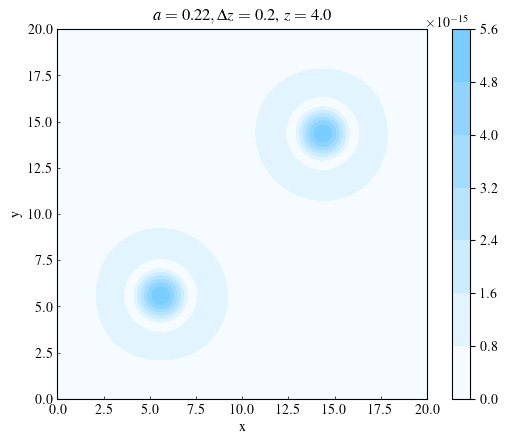

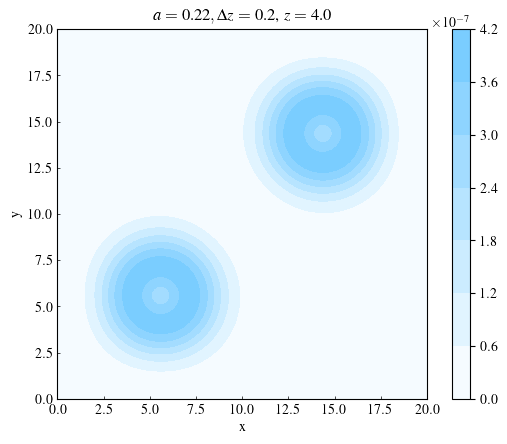

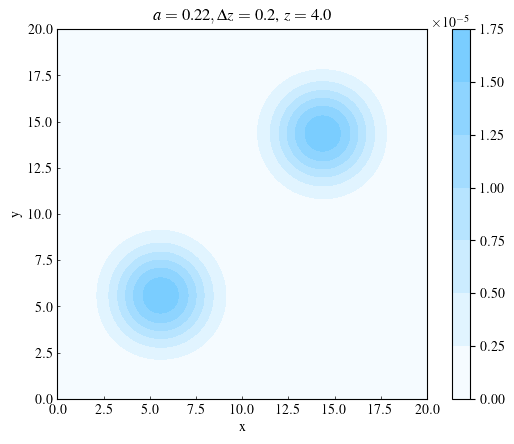

In [15]:
for iiz in list((iz_photo, iz_z0half, iz_z0, iz_2z0)):
    zii = np.floor(z_arr[iiz])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        abs(data3d_02.dpressure[:, :, iiz] - data3dNW_02.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$a =$ "
        + str(a)
        + r"$, \Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/" + str(0.2) + "/dperror_" + str(zii) + "_" + str(0.2) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        abs(data3d_10.dpressure[:, :, iiz] - data3dNW_10.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$a =$ "
        + str(a)
        + r"$, \Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/" + str(1.0) + "/dperror_" + str(zii) + "_" + str(1.0) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    C = ax.contourf(
        x_plot,
        y_plot,
        abs(data3d_20.dpressure[:, :, iiz] - data3dNW_20.dpressure[:, :, iiz]),
        6,
        cmap=ErrormapP,
        # vmin = data3d.dpressure[:, :, iiz].min(),
        # vmax = data3d.dpressure[:, :, iiz].max(),
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_box_aspect(1)
    ax.tick_params(direction="in", length=2, width=0.5)
    fig.colorbar(C)
    plt.title(
        r"$a =$ "
        + str(a)
        + r"$, \Delta z = $ "
        + str(deltaz)
        + r", $ z =$ "
        + str(zii)
    )
    plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/" + str(2.0) + "/dperror_" + str(zii) + "_" + str(2.0) + ".png"
    plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [16]:
error02_max = np.zeros_like(z_arr)

error10_max = np.zeros_like(z_arr)

error20_max = np.zeros_like(z_arr)

error02_max_22 = np.zeros_like(z_arr)

error10_max_22 = np.zeros_like(z_arr)

error20_max_22 = np.zeros_like(z_arr)

In [17]:
for iz in range(nresol_z):
    error02_max[iz] = abs(
        data3d_02.dpressure[:, :, iz] - data3dNW_02.dpressure[:, :, iz]
    ).max()
    error10_max[iz] = abs(
        data3d_10.dpressure[:, :, iz] - data3dNW_10.dpressure[:, :, iz]
    ).max()
    error20_max[iz] = abs(
        data3d_20.dpressure[:, :, iz] - data3dNW_20.dpressure[:, :, iz]
    ).max()
    error02_max_22[iz] = abs(
        data3d_02_22.dpressure[:, :, iz] - data3dNW_02_22.dpressure[:, :, iz]
    ).max()
    error10_max_22[iz] = abs(
        data3d_10_22.dpressure[:, :, iz] - data3dNW_10_22.dpressure[:, :, iz]
    ).max()
    error20_max_22[iz] = abs(
        data3d_20_22.dpressure[:, :, iz] - data3dNW_20_22.dpressure[:, :, iz]
    ).max()

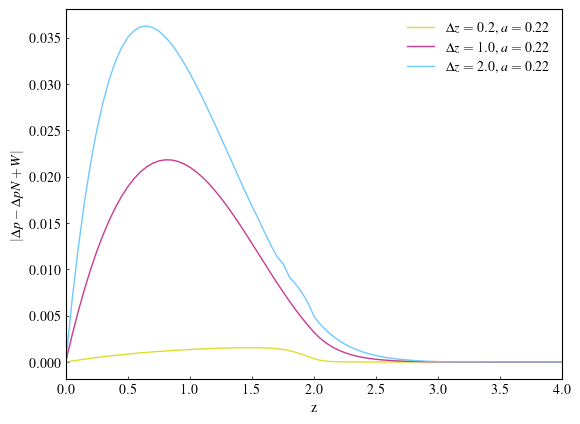

In [19]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d.z,
    error02_max,
    linewidth=1.0,
    color=c8,
    label=r"$\Delta z = 0.2$, $a =$ " + str(a),
)
ax1.plot(
    data3d.z,
    error10_max,
    linewidth=1.0,
    color=c5,
    label=r"$\Delta z = 1.0$, $a =$ " + str(a),
)
ax1.plot(
    data3d.z,
    error20_max,
    linewidth=1.0,
    linestyle="solid",
    color=c1,
    label=r"$\Delta z = 2.0$, $a =$ " + str(a),
)


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
ax1.set_ylabel(r"$|\Delta p - \Delta p{N+W}|$")

plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/maxerror_by_z.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

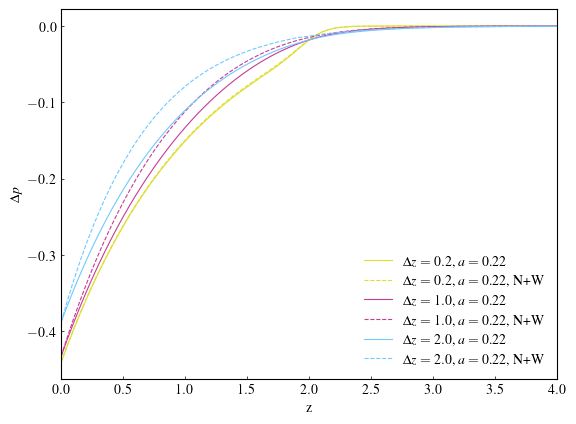

In [21]:
ix_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[1]
iy_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[0]


plt.plot(
    data3d_20.z,
    data3d_02.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c8,
    label=r"$\Delta z = 0.2$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_02.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c8,
    label=r"$\Delta z = 0.2$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_10.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c5,
    label=r"$\Delta z = 1.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_10.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c5,
    label=r"$\Delta z = 1.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_20.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c1,
    label=r"$\Delta z = 2.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_20.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c1,
    label=r"$\Delta z = 2.0$, $a =$ " + str(a) + ", N+W",
)

plt.xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
plt.tick_params(direction="in", length=2, width=0.5)
plt.ylabel(
    r"$\Delta p$"
)
plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/dp_by_z.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

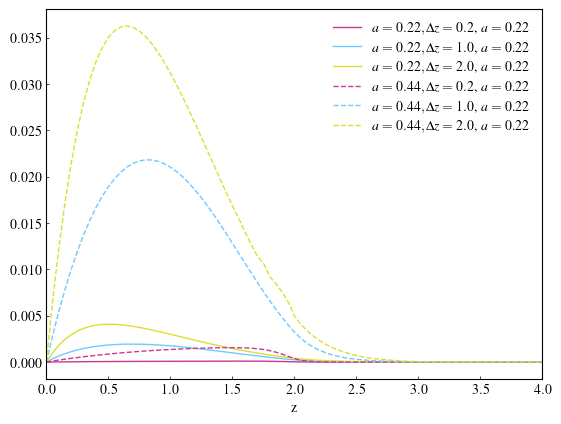

In [22]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_20.z,
    error02_max_22,
    linewidth=1.0,
    linestyle="solid",
    color=c5,
    label=r"$a = 0.22, \Delta z = 0.2$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error10_max_22,
    linewidth=1.0,
    linestyle="solid",
    color=c1,
    label=r"$a = 0.22, \Delta z = 1.0$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error20_max_22,
    linewidth=1.0,
    linestyle="solid",
    color=c8,
    label=r"$a = 0.22, \Delta z = 2.0$, $a =$ " + str(a),
)

ax1.plot(
    data3d_20.z,
    error02_max,
    linewidth=1.0,
    linestyle="dashed",
    color=c5,
    label=r"$a = 0.44, \Delta z = 0.2$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error10_max,
    linewidth=1.0,
    linestyle="dashed",
    color=c1,
    label=r"$a = 0.44, \Delta z = 1.0$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error20_max,
    linewidth=1.0,
    linestyle="dashed",
    color=c8,
    label=r"$a = 0.44, \Delta z = 2.0$, $a =$ " + str(a),
)


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

# plt.title(
#     r"$\Delta p$ maximal error"
# )
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
# ax1.set_ylabel(r"$\Delta p$")
# ax1.set_xscale("log")

plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/maxerror_by_z_all.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

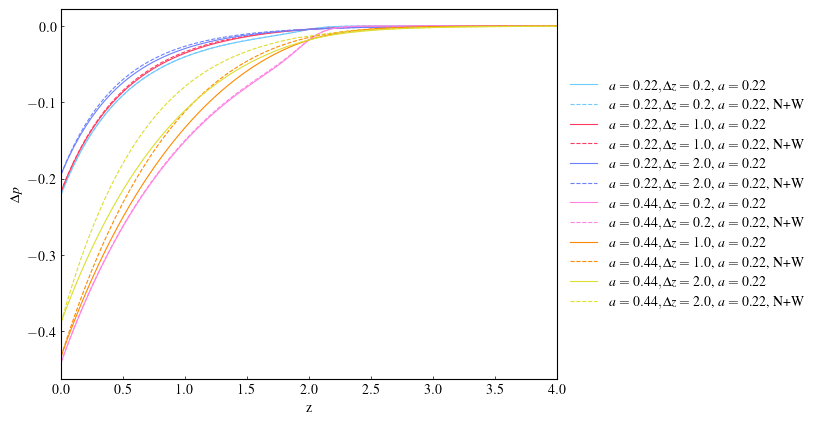

In [23]:
ix_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[1]
iy_max = np.unravel_index(data3d_20.bz.argmax(), data3d_20.bz.shape)[0]

plt.plot(
    data3d_20.z,
    data3d_02_22.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c1,
    label=r"$a=0.22, \Delta z = 0.2$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_02_22.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c1,
    label=r"$a=0.22, \Delta z = 0.2$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_10_22.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c4,
    label=r"$a=0.22, \Delta z = 1.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_10_22.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c4,
    label=r"$a=0.22, \Delta z = 1.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_20_22.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c2,
    label=r"$a=0.22, \Delta z = 2.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_20_22.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c2,
    label=r"$a=0.22, \Delta z = 2.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_02.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=((1, 0.514, 0.89)),
    label=r"$a=0.44, \Delta z = 0.2$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_02.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=((1, 0.514, 0.89)),
    label=r"$a=0.44, \Delta z = 0.2$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_10.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=((1, 0.537, 0)),
    label=r"$a=0.44, \Delta z = 1.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_10.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=((1, 0.537, 0)),
    label=r"$a=0.44, \Delta z = 1.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_20.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c8,
    label=r"$a=0.44, \Delta z = 2.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_20.dpressure[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c8,
    label=r"$a=0.44, \Delta z = 2.0$, $a =$ " + str(a) + ", N+W",
)

plt.xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tick_params(direction="in", length=2, width=0.5)
# plt.title(
#     r"Plasma pressure variations: $a =$ " + str(a)
# )
# plt.xscale("log")
plt.ylabel(r"$\Delta p$")
plotname = "/Users/lilli/Desktop/Thesis/Performance/P/" + str(a) + "/dp_by_z_all.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

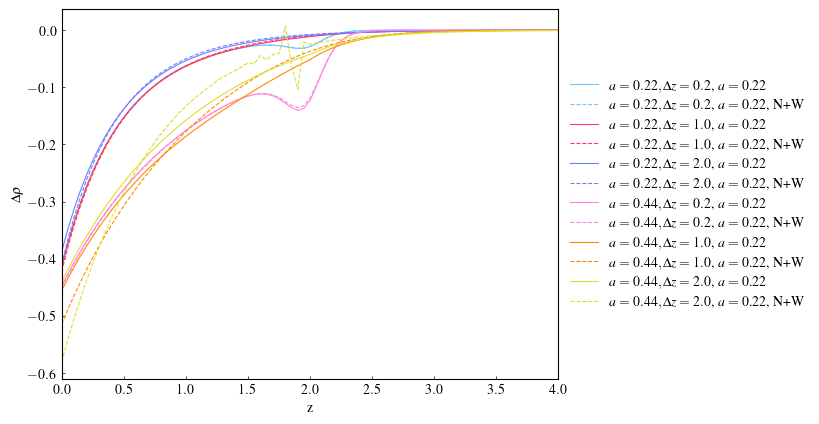

In [24]:
plt.plot(
    data3d_20.z,
    data3d_02_22.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c1,
    label=r"$a=0.22, \Delta z = 0.2$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_02_22.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c1,
    label=r"$a=0.22, \Delta z = 0.2$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_10_22.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c4,
    label=r"$a=0.22, \Delta z = 1.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_10_22.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c4,
    label=r"$a=0.22, \Delta z = 1.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_20_22.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c2,
    label=r"$a=0.22, \Delta z = 2.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_20_22.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c2,
    label=r"$a=0.22, \Delta z = 2.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_02.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=((1, 0.514, 0.89)),
    label=r"$a=0.44, \Delta z = 0.2$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_02.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=((1, 0.514, 0.89)),
    label=r"$a=0.44, \Delta z = 0.2$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_10.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=((1, 0.537, 0)),
    label=r"$a=0.44, \Delta z = 1.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_10.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=((1, 0.537, 0)),
    label=r"$a=0.44, \Delta z = 1.0$, $a =$ " + str(a) + ", N+W",
)

plt.plot(
    data3d_20.z,
    data3d_20.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="solid",
    color=c8,
    label=r"$a=0.44, \Delta z = 2.0$, $a =$ " + str(a),
)
plt.plot(
    data3d_20.z,
    data3dNW_20.ddensity[iy_max, ix_max, :],
    linewidth=0.8,
    linestyle="--",
    color=c8,
    label=r"$a=0.44, \Delta z = 2.0$, $a =$ " + str(a) + ", N+W",
)

plt.xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tick_params(direction="in", length=2, width=0.5)
# plt.title(
#     r"Plasma pressure variations: $a =$ " + str(a)
# )
# plt.xscale("log")
plt.ylabel(r"$\Delta \rho$")
plotname = "/Users/lilli/Desktop/Thesis/Performance/RHO/" + str(a) + "/dd_by_z_all.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [25]:
error02_max = np.zeros_like(z_arr)

error10_max = np.zeros_like(z_arr)

error20_max = np.zeros_like(z_arr)

error02_max_22 = np.zeros_like(z_arr)

error10_max_22 = np.zeros_like(z_arr)

error20_max_22 = np.zeros_like(z_arr)

In [26]:
for iz in range(nresol_z):
    error02_max[iz] = abs(
        data3d_02.ddensity[:, :, iz] - data3dNW_02.ddensity[:, :, iz]
    ).max()
    error10_max[iz] = abs(
        data3d_10.ddensity[:, :, iz] - data3dNW_10.ddensity[:, :, iz]
    ).max()
    error20_max[iz] = abs(
        data3d_20.ddensity[:, :, iz] - data3dNW_20.ddensity[:, :, iz]
    ).max()
    error02_max_22[iz] = abs(
        data3d_02_22.ddensity[:, :, iz] - data3dNW_02_22.ddensity[:, :, iz]
    ).max()
    error10_max_22[iz] = abs(
        data3d_10_22.ddensity[:, :, iz] - data3dNW_10_22.ddensity[:, :, iz]
    ).max()
    error20_max_22[iz] = abs(
        data3d_20_22.ddensity[:, :, iz] - data3dNW_20_22.ddensity[:, :, iz]
    ).max()

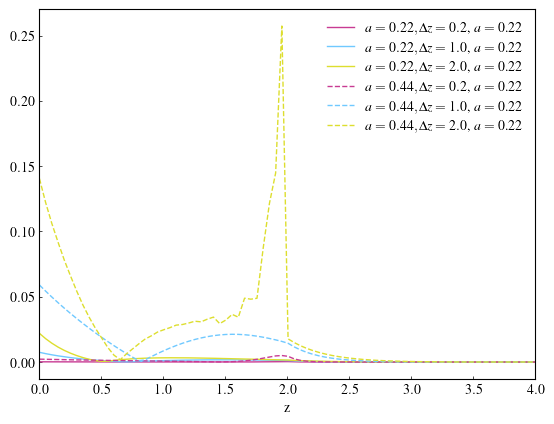

In [27]:
fig, ax1 = plt.subplots()

ax1.plot(
    data3d_20.z,
    error02_max_22,
    linewidth=1.0,
    linestyle="solid",
    color=c5,
    label=r"$a = 0.22, \Delta z = 0.2$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error10_max_22,
    linewidth=1.0,
    linestyle="solid",
    color=c1,
    label=r"$a = 0.22, \Delta z = 1.0$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error20_max_22,
    linewidth=1.0,
    linestyle="solid",
    color=c8,
    label=r"$a = 0.22, \Delta z = 2.0$, $a =$ " + str(a),
)

ax1.plot(
    data3d_20.z,
    error02_max,
    linewidth=1.0,
    linestyle="dashed",
    color=c5,
    label=r"$a = 0.44, \Delta z = 0.2$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error10_max,
    linewidth=1.0,
    linestyle="dashed",
    color=c1,
    label=r"$a = 0.44, \Delta z = 1.0$, $a =$ " + str(a),
)
ax1.plot(
    data3d_20.z,
    error20_max,
    linewidth=1.0,
    linestyle="dashed",
    color=c8,
    label=r"$a = 0.44, \Delta z = 2.0$, $a =$ " + str(a),
)


ax1.set_xlabel("z")
plt.xlim([0, 2 * z0])
plt.legend(frameon=False)
ax1.tick_params(direction="in", length=2, width=0.5)

# plt.title(
#     r"$\Delta p$ maximal error"
# )
lines1, labels1 = ax1.get_legend_handles_labels()

lines = lines1
labels = labels1
# ax1.set_ylabel(r"$\Delta \rho$")
# ax1.set_xscale("log")

plt.legend(lines, labels, frameon=False)
plotname = "/Users/lilli/Desktop/Thesis/Performance/RHO/" + str(a) + "/maxerror_by_z_all.png"
plt.savefig(plotname, dpi=600, bbox_inches="tight", pad_inches=0.1)
plt.show()